<a href="https://colab.research.google.com/github/twice1st/Detecting-and-Beautifying-Vietnamese-Faces/blob/main/Source%20code/face_HSV_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

1. Chọn ngưỡng trong không gian HSV
2. Thực nghiệm các phương pháp làm mịn

In [ ]:
def smooth_face(detected_img):
        temp_img = detected_img.copy()
        # Chuyển ảnh sang không gian màu HSV
        hsv_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2HSV)
        # Lẫy ngưỡng cân bằng nhất
        hsv_mask = cv2.inRange(hsv_img, 
                               np.array((0.0, 75.0, 75.0)), 
                               np.array((100.0, 255.0, 255.0)))
        full_mask = cv2.merge((hsv_mask, hsv_mask, hsv_mask))
        # Áp dụng các phương pháp làm mịn
        # Bilateral
        blurred_img = cv2.bilateralFilter(detected_img, 15, 70, 70)

        # Gaussian
        # blurred_img = cv2.GaussianBlur(detected_img, (11, 11), 0)
        
        # Averager
        # blurred_img = cv2.blur(detected_img,(9,9))

        # Xác định thành phần của ảnh và hoàn thiện ảnh output
        masked_img = cv2.bitwise_and(blurred_img, full_mask)
        
        inverted_mask = cv2.bitwise_not(full_mask)
        
        masked_img2 = cv2.bitwise_and(temp_img, inverted_mask)
        
        smoothed_roi = cv2.add(masked_img2, masked_img)
        
        return full_mask, smoothed_roi, blurred_img, hsv_mask, hsv_img, masked_img, inverted_mask, masked_img2

In [ ]:
img = cv2.imread('/content/abc.jpg')

In [ ]:
full_mask, smoothed_roi, blurred_img, hsv_mask, hsv_img, masked_img, inverted_mask, masked_img2 = smooth_face(img)

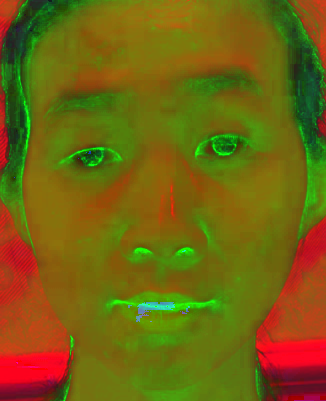

In [ ]:
# Ảnh sau khi chuyển sang hệ màu HSV
cv2_imshow(hsv_img)

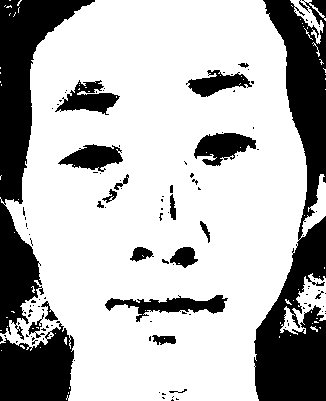

In [ ]:
# Ảnh xác định vùng da (lấy ngưỡng)
cv2_imshow(hsv_mask)

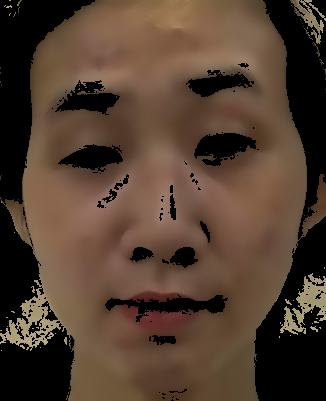

In [ ]:
# Ảnh làm mịn vùng da
cv2_imshow(masked_img)

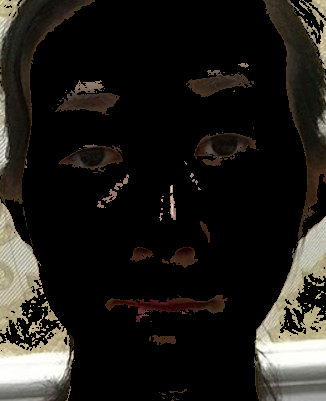

In [ ]:
# Ảnh xác định những vùng không phải là da
cv2_imshow(masked_img2)

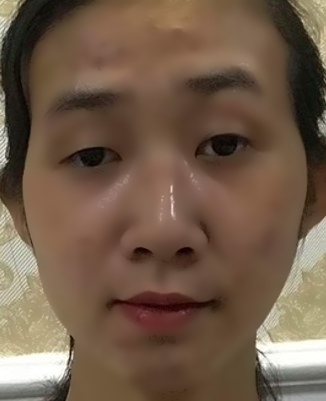

In [ ]:
# Ảnh output
cv2_imshow(smoothed_roi)

# Thực nghiệm chọn ngưỡng

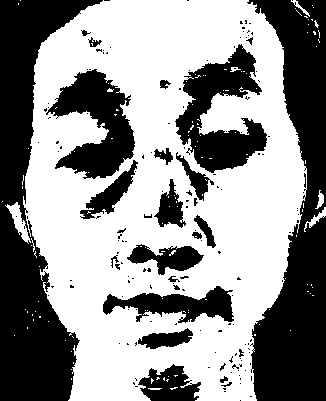

In [ ]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv_mask = cv2.inRange(hsv_img, 
                       np.array((0.0, 90.0, 90.0)), 
                       np.array((100.0, 255.0, 255.0)))
cv2_imshow(hsv_mask)

# Thực nghiệm các phương pháp làm mịn

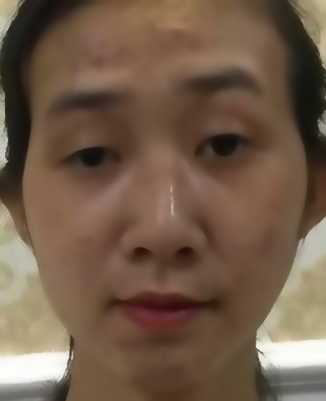

In [ ]:
blurred_img = cv2.bilateralFilter(img, 15, 120, 4)
cv2_imshow(blurred_img)

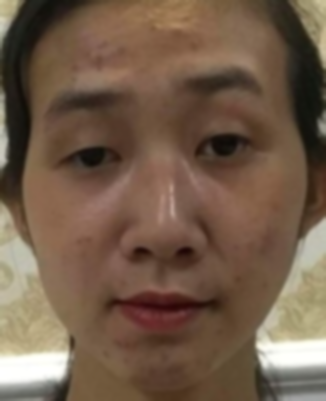

In [ ]:
blurred_img = cv2.GaussianBlur(img, (9, 9), 0)
cv2_imshow(blurred_img)

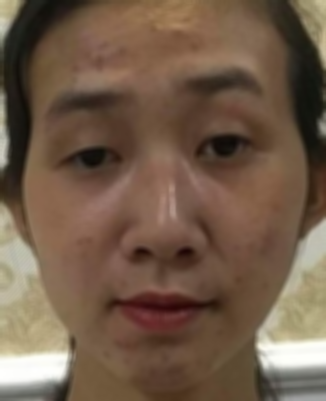

In [ ]:
blurred_img = cv2.blur(img,(6,6))
cv2_imshow(blurred_img)

code sobel edge detection

In [ ]:
def Split(hsv_img):
  # Tách rời 3 kênh màu
    h,s,v = cv2.split(hsv_img)
    return h,s,v

In [ ]:
def sobel_filters(face,blur_ksize=3, sobel_ksize=3):
  # Bộ lọc sobel theo hướng x,y để phát hiện da
    img_gaussian = cv2.GaussianBlur(face,(blur_ksize,blur_ksize),0)
    img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_64F,1,0,ksize=sobel_ksize)
    img_sobely = cv2.Sobel(img_gaussian,cv2.CV_64F,0,1,ksize=sobel_ksize)
    return img_sobelx,img_sobely

In [ ]:
def Findskinmap(face,th_x=20,th_y=20):
  # Hàm tìm vùng da
    sobel_x,sobel_y = sobel_filters(face)
    skin_map= face.copy()
    for row in range (face.shape[0]):
        for col in range (face.shape[1]):
            x_value= sobel_x[row,col]
            y_value= sobel_y[row,col]
            if (x_value<th_x) and (y_value<th_y) and ((pow(x_value,2)+pow(y_value,2))<(pow(th_x,2)+pow(th_y,2))):
                skin_map[row][col]=255
            else: 
                skin_map[row][col]=0
    return skin_map

In [ ]:
def Smooth(face):
  hsv_img= cv2.cvtColor(face, cv2.COLOR_RGB2HSV)
  hi,si,vi= Split(hsv_img)
  skin_map= Findskinmap(vi)
  x,y= sobel_filters(face)
  full_mask = cv2.merge((skin_map, skin_map, skin_map))
  blurred_img = cv2.bilateralFilter(face, 15, 70, 70)
  # Apply mask to image
  masked_img = cv2.bitwise_and(blurred_img, full_mask)
  # Invert mask
  inverted_mask = cv2.bitwise_not(full_mask)
  # Created anti-mask
  masked_img2 = cv2.bitwise_and(face, inverted_mask)
  # Add the masked images together
  smoothed_roi = cv2.add(masked_img2, masked_img)
  return smoothed_roi, blurred_img, masked_img, skin_map, inverted_mask, masked_img2

In [ ]:
# Show 2 image
import matplotlib.pyplot as plt
import cv2 as cv
def Output_img2(img1, img2, title1="image 1", title2="image 2"):
  plt.figure(figsize=(15, 15))
  plt.subplot(1, 2, 1)
  img_src = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
  img_src = plt.imshow(img_src, interpolation = 'bicubic')
  plt.title(title1)

  plt.subplot(1,2,2)
  img_rst = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
  img_src = plt.imshow(img_rst, interpolation = 'bicubic')
  plt.title(title2)

# Thực nghiệm ảnh đủ, dư và thiếu sáng.

Trường hợp: Đủ sáng

In [ ]:
img = cv2.imread('/content/abc.jpg')
mask_hsv = smooth_face(img)[3]
mask_sobel = Smooth(img)[3]

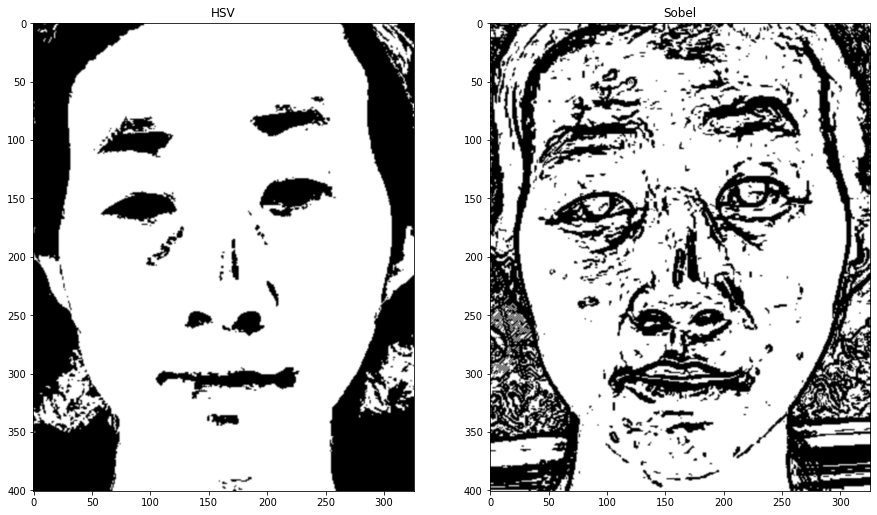

In [ ]:
Output_img2(mask_hsv, mask_sobel, "HSV", "Sobel")

Trường hợp: Dư sáng

In [ ]:
img = cv2.imread('/content/dusang.jpg')
mask_hsv = smooth_face(img)[3]
mask_sobel = Smooth(img)[3]

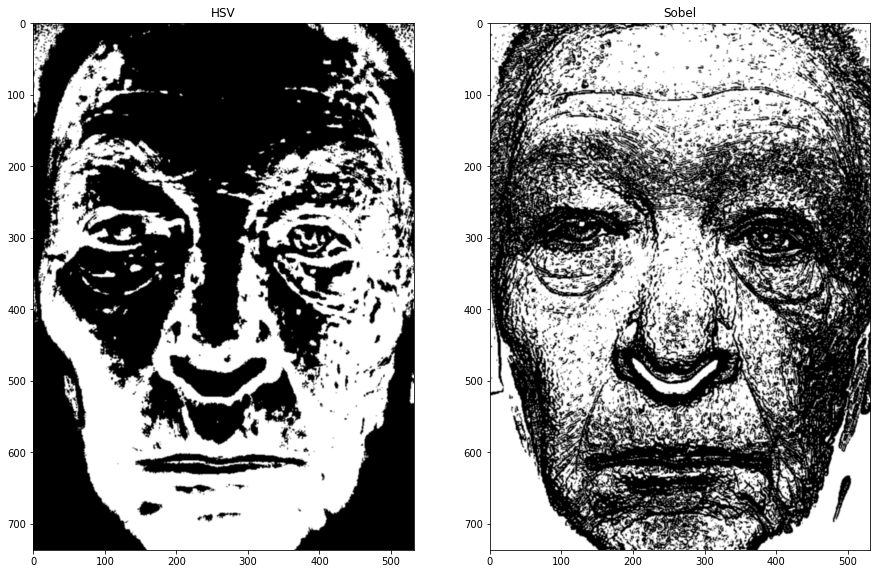

In [ ]:
Output_img2(mask_hsv, mask_sobel, "HSV", "Sobel")

Trường hợp: Thiếu sáng

In [ ]:
img = cv2.imread('/content/thieusang.jpg')
mask_hsv = smooth_face(img)[3]
mask_sobel = Smooth(img)[3]

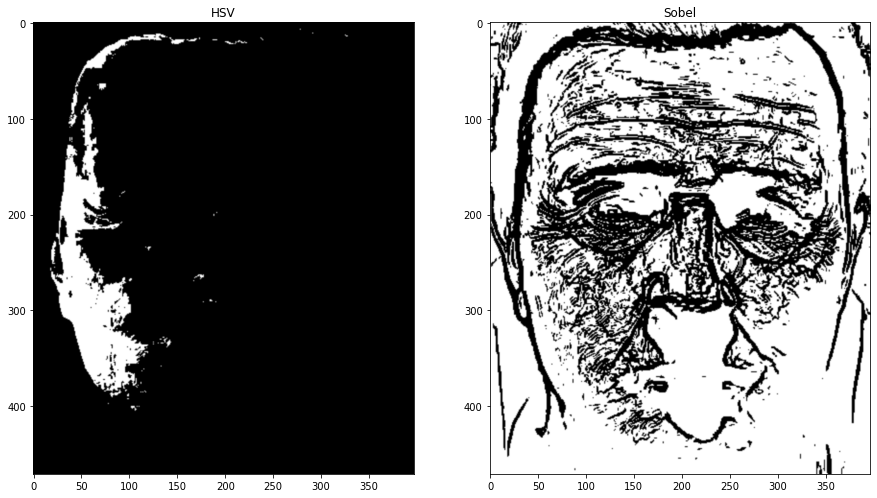

In [ ]:
Output_img2(mask_hsv, mask_sobel, "HSV", "Sobel")